## Super Resolution CNN Networks

### Goal
Turn low resolution images into high resolution images.

### Neural Network
![nn](nn_img.jpg)

A Neural Network is most simply, a series of collection of nodes and connections between nodes, constructed to solve a specific problem.  

Typically the left most nodes are your inputs and the right most node is your output.  Each node is typically a weighted sum of its inputs with an activation function applied.

`f(a*x + b*y + c*z)`, `f` is the activation applied to the weighted sum of the inputs `x,y,z`.

Most popular is the REctified Linear Unit (RELU activation), but can be any function.

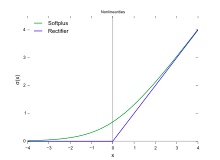


Let's look at a simple example, say we want to build a Neural Network that does the following.
1. Takes two inputs, `a` and `b`.
2. Output `2*a + b`

Pretty simple, we can build this by hand.


In [2]:
from tensorflow import keras
import numpy as np

# take in 2 inputs
inputs = keras.layers.Input(shape=(2)) 

# connect all the inputs to 1 output node with specified weight
output = keras.layers.Dense(1, weights=[np.array([[2],[1]]), np.array([0])])(inputs)

# finish making model
model = keras.Model(inputs=inputs, outputs=output)
model.compile(keras.optimizers.Adam(), "mean_squared_error")

# model summary
model.summary()

# test on data
x = np.random.randint(0, 10, size=(10,2))
y = model.predict(x)

for i in range(x.shape[0]):
    print(x[i,:], y[i,:])


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
[0 0] [0.]
[0 5] [5.]
[2 4] [8.]
[2 3] [7.]
[0 8] [8.]
[5 9] [19.]
[2 4] [8.]
[7 8] [22.]
[9 1] [19.]
[7 9] [23.]


In this example, we build the network by hand.  Typically you don't know what the network should look like.  You let the network "learn" what it should be by optimizing it against a dataset.

In [3]:
# data
x = np.random.randint(0, 10, size=(10,2))
y = 2*x[:,0] + x[:,1]

# build model
inputs = keras.layers.Input(shape=(2)) 
output = keras.layers.Dense(1)(inputs)

model = keras.Model(inputs=inputs, outputs=output)
model.compile(keras.optimizers.Adam(learning_rate=0.01), "mean_squared_error")
model.summary()

# train model
model.fit(x,y, epochs = 1000)
z = model.predict(x)

# look at results
for i in range(x.shape[0]):
    print(x[i,:], z[i,:])
print(model.get_weights())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Train on 10 samples
Epoch 1/1000
10/10 [==============================] - 1s 51ms/sample - loss: 462.2416
Epoch 2/1000
10/10 [==============================] - 0s 1ms/sample - loss: 458.1763
Epoch 3/1000
10/10 [==============================] - 0s 963us/sample - loss: 454.1295
Epoch 4/1000
10/10 [==============================] - 0s 1ms/sample - loss: 450.1013
Epoch 5/1000
10/10 [==============================] - 0s 2ms/sample - loss: 446.0922
Epoch 6/1000
10/10 [==============================] - 0s 2ms/sample - loss: 442

Epoch 88/1000
10/10 [==============================] - 0s 946us/sample - loss: 191.3656
Epoch 89/1000
10/10 [==============================] - 0s 2ms/sample - loss: 189.2096
Epoch 90/1000
10/10 [==============================] - 0s 550us/sample - loss: 187.0727
Epoch 91/1000
10/10 [==============================] - 0s 665us/sample - loss: 184.9549
Epoch 92/1000
10/10 [==============================] - 0s 1ms/sample - loss: 182.8561
Epoch 93/1000
10/10 [==============================] - 0s 516us/sample - loss: 180.7761
Epoch 94/1000
10/10 [==============================] - 0s 351us/sample - loss: 178.7148
Epoch 95/1000
10/10 [==============================] - 0s 579us/sample - loss: 176.6722
Epoch 96/1000
10/10 [==============================] - 0s 406us/sample - loss: 174.6481
Epoch 97/1000
10/10 [==============================] - 0s 461us/sample - loss: 172.6424
Epoch 98/1000
10/10 [==============================] - 0s 314us/sample - loss: 170.6550
Epoch 99/1000
10/10 [===============

Epoch 181/1000
10/10 [==============================] - 0s 568us/sample - loss: 58.9832
Epoch 182/1000
10/10 [==============================] - 0s 425us/sample - loss: 58.1595
Epoch 183/1000
10/10 [==============================] - 0s 634us/sample - loss: 57.3455
Epoch 184/1000
10/10 [==============================] - 0s 501us/sample - loss: 56.5411
Epoch 185/1000
10/10 [==============================] - 0s 446us/sample - loss: 55.7463
Epoch 186/1000
10/10 [==============================] - 0s 537us/sample - loss: 54.9610
Epoch 187/1000
10/10 [==============================] - 0s 584us/sample - loss: 54.1851
Epoch 188/1000
10/10 [==============================] - 0s 561us/sample - loss: 53.4185
Epoch 189/1000
10/10 [==============================] - 0s 716us/sample - loss: 52.6612
Epoch 190/1000
10/10 [==============================] - 0s 481us/sample - loss: 51.9130
Epoch 191/1000
10/10 [==============================] - 0s 623us/sample - loss: 51.1738
Epoch 192/1000
10/10 [==========

Epoch 275/1000
10/10 [==============================] - 0s 1ms/sample - loss: 13.8071
Epoch 276/1000
10/10 [==============================] - 0s 298us/sample - loss: 13.5779
Epoch 277/1000
10/10 [==============================] - 0s 785us/sample - loss: 13.3523
Epoch 278/1000
10/10 [==============================] - 0s 456us/sample - loss: 13.1300
Epoch 279/1000
10/10 [==============================] - 0s 392us/sample - loss: 12.9112
Epoch 280/1000
10/10 [==============================] - 0s 437us/sample - loss: 12.6958
Epoch 281/1000
10/10 [==============================] - 0s 492us/sample - loss: 12.4837
Epoch 282/1000
10/10 [==============================] - 0s 564us/sample - loss: 12.2749
Epoch 283/1000
10/10 [==============================] - 0s 730us/sample - loss: 12.0693
Epoch 284/1000
10/10 [==============================] - 0s 320us/sample - loss: 11.8670
Epoch 285/1000
10/10 [==============================] - 0s 1ms/sample - loss: 11.6678
Epoch 286/1000
10/10 [==============

Epoch 370/1000
10/10 [==============================] - 0s 899us/sample - loss: 2.7058
Epoch 371/1000
10/10 [==============================] - 0s 608us/sample - loss: 2.6613
Epoch 372/1000
10/10 [==============================] - 0s 476us/sample - loss: 2.6177
Epoch 373/1000
10/10 [==============================] - 0s 640us/sample - loss: 2.5749
Epoch 374/1000
10/10 [==============================] - 0s 363us/sample - loss: 2.5329
Epoch 375/1000
10/10 [==============================] - 0s 510us/sample - loss: 2.4917
Epoch 376/1000
10/10 [==============================] - 0s 1ms/sample - loss: 2.4513
Epoch 377/1000
10/10 [==============================] - 0s 2ms/sample - loss: 2.4117
Epoch 378/1000
10/10 [==============================] - 0s 535us/sample - loss: 2.3728
Epoch 379/1000
10/10 [==============================] - 0s 636us/sample - loss: 2.3347
Epoch 380/1000
10/10 [==============================] - 0s 430us/sample - loss: 2.2973
Epoch 381/1000
10/10 [=========================

Epoch 465/1000
10/10 [==============================] - 0s 546us/sample - loss: 0.7980
Epoch 466/1000
10/10 [==============================] - 0s 926us/sample - loss: 0.7918
Epoch 467/1000
10/10 [==============================] - 0s 355us/sample - loss: 0.7857
Epoch 468/1000
10/10 [==============================] - 0s 678us/sample - loss: 0.7798
Epoch 469/1000
10/10 [==============================] - 0s 303us/sample - loss: 0.7740
Epoch 470/1000
10/10 [==============================] - 0s 1ms/sample - loss: 0.7683
Epoch 471/1000
10/10 [==============================] - 0s 703us/sample - loss: 0.7627
Epoch 472/1000
10/10 [==============================] - 0s 366us/sample - loss: 0.7573
Epoch 473/1000
10/10 [==============================] - 0s 415us/sample - loss: 0.7520
Epoch 474/1000
10/10 [==============================] - 0s 706us/sample - loss: 0.7468
Epoch 475/1000
10/10 [==============================] - 0s 2ms/sample - loss: 0.7417
Epoch 476/1000
10/10 [=========================

Epoch 560/1000
10/10 [==============================] - 0s 641us/sample - loss: 0.5490
Epoch 561/1000
10/10 [==============================] - 0s 863us/sample - loss: 0.5481
Epoch 562/1000
10/10 [==============================] - 0s 854us/sample - loss: 0.5474
Epoch 563/1000
10/10 [==============================] - 0s 644us/sample - loss: 0.5466
Epoch 564/1000
10/10 [==============================] - 0s 431us/sample - loss: 0.5458
Epoch 565/1000
10/10 [==============================] - 0s 440us/sample - loss: 0.5451
Epoch 566/1000
10/10 [==============================] - 0s 553us/sample - loss: 0.5443
Epoch 567/1000
10/10 [==============================] - 0s 862us/sample - loss: 0.5436
Epoch 568/1000
10/10 [==============================] - 0s 1ms/sample - loss: 0.5429
Epoch 569/1000
10/10 [==============================] - 0s 2ms/sample - loss: 0.5422
Epoch 570/1000
10/10 [==============================] - 0s 1ms/sample - loss: 0.5415
Epoch 571/1000
10/10 [===========================

Epoch 655/1000
10/10 [==============================] - 0s 252us/sample - loss: 0.5066
Epoch 656/1000
10/10 [==============================] - 0s 417us/sample - loss: 0.5063
Epoch 657/1000
10/10 [==============================] - 0s 391us/sample - loss: 0.5061
Epoch 658/1000
10/10 [==============================] - 0s 371us/sample - loss: 0.5058
Epoch 659/1000
10/10 [==============================] - 0s 516us/sample - loss: 0.5055
Epoch 660/1000
10/10 [==============================] - 0s 366us/sample - loss: 0.5052
Epoch 661/1000
10/10 [==============================] - 0s 2ms/sample - loss: 0.5050
Epoch 662/1000
10/10 [==============================] - 0s 775us/sample - loss: 0.5047
Epoch 663/1000
10/10 [==============================] - 0s 508us/sample - loss: 0.5044
Epoch 664/1000
10/10 [==============================] - 0s 628us/sample - loss: 0.5042
Epoch 665/1000
10/10 [==============================] - 0s 361us/sample - loss: 0.5039
Epoch 666/1000
10/10 [=======================

Epoch 750/1000
10/10 [==============================] - 0s 862us/sample - loss: 0.4829
Epoch 751/1000
10/10 [==============================] - 0s 505us/sample - loss: 0.4827
Epoch 752/1000
10/10 [==============================] - 0s 707us/sample - loss: 0.4824
Epoch 753/1000
10/10 [==============================] - 0s 466us/sample - loss: 0.4822
Epoch 754/1000
10/10 [==============================] - 0s 547us/sample - loss: 0.4820
Epoch 755/1000
10/10 [==============================] - 0s 798us/sample - loss: 0.4817
Epoch 756/1000
10/10 [==============================] - 0s 352us/sample - loss: 0.4815
Epoch 757/1000
10/10 [==============================] - 0s 517us/sample - loss: 0.4813
Epoch 758/1000
10/10 [==============================] - 0s 412us/sample - loss: 0.4810
Epoch 759/1000
10/10 [==============================] - 0s 537us/sample - loss: 0.4808
Epoch 760/1000
10/10 [==============================] - 0s 338us/sample - loss: 0.4806
Epoch 761/1000
10/10 [=====================

Epoch 845/1000
10/10 [==============================] - 0s 738us/sample - loss: 0.4613
Epoch 846/1000
10/10 [==============================] - 0s 1ms/sample - loss: 0.4610
Epoch 847/1000
10/10 [==============================] - 0s 693us/sample - loss: 0.4608
Epoch 848/1000
10/10 [==============================] - 0s 349us/sample - loss: 0.4606
Epoch 849/1000
10/10 [==============================] - 0s 561us/sample - loss: 0.4604
Epoch 850/1000
10/10 [==============================] - 0s 766us/sample - loss: 0.4602
Epoch 851/1000
10/10 [==============================] - 0s 339us/sample - loss: 0.4599
Epoch 852/1000
10/10 [==============================] - 0s 514us/sample - loss: 0.4597
Epoch 853/1000
10/10 [==============================] - 0s 360us/sample - loss: 0.4595
Epoch 854/1000
10/10 [==============================] - 0s 377us/sample - loss: 0.4593
Epoch 855/1000
10/10 [==============================] - 0s 390us/sample - loss: 0.4590
Epoch 856/1000
10/10 [=======================

Epoch 940/1000
10/10 [==============================] - 0s 394us/sample - loss: 0.4407
Epoch 941/1000
10/10 [==============================] - 0s 1ms/sample - loss: 0.4405
Epoch 942/1000
10/10 [==============================] - 0s 1ms/sample - loss: 0.4403
Epoch 943/1000
10/10 [==============================] - 0s 552us/sample - loss: 0.4401
Epoch 944/1000
10/10 [==============================] - 0s 402us/sample - loss: 0.4398
Epoch 945/1000
10/10 [==============================] - 0s 783us/sample - loss: 0.4396
Epoch 946/1000
10/10 [==============================] - 0s 392us/sample - loss: 0.4394
Epoch 947/1000
10/10 [==============================] - 0s 400us/sample - loss: 0.4392
Epoch 948/1000
10/10 [==============================] - 0s 439us/sample - loss: 0.4390
Epoch 949/1000
10/10 [==============================] - 0s 648us/sample - loss: 0.4388
Epoch 950/1000
10/10 [==============================] - 0s 324us/sample - loss: 0.4386
Epoch 951/1000
10/10 [=========================

### Convolutional Neural Networks
When solving computer vision problems, local information is what's most important to a problem.  Example, if you're trying to decide if an image contains a cat, looking at 2 pixels that are opposite corners of the image is less useful then looking at pixels that are very close to each other.  

Neural Networks can adapt can account for this by using Convolutional Layers, Networks that use these are called Convolutional Neural Networks.

![image.png](convolution.png)

A convolution consists of a "filter" applied to a local patch of the input.

These filters can represent simple geometric features (vertical lines, diagnoal lines) and can represent more advanced features (cat, dog) by stacking them.

In [140]:
# Simple image problem

# Want to detect greyscale images that look like
# 1 0 0 0 0
# 0 1 0 0 0
# 0 0 1 0 0
# 0 0 0 1 0
# 0 0 0 0 1

shape = 2

# inputs
positives = [np.expand_dims(np.expand_dims(np.eye(shape,shape), axis=0), axis=3)]

base_negatives = []
for i in range(shape):
    negative = np.zeros((1,shape,shape,1))
    negative[0,i,i,0]=1
    base_negatives.append(negative)
base_negatives = np.concatenate(base_negatives,axis=0)

negatives = []
for i in range(100):    
    noise_negatives = base_negatives + np.random.uniform(0,.5,size=base_negatives.shape)
    negatives.append(noise_negatives)

x = positives + negatives
x = np.concatenate( x, axis=0)
print(x.shape)

# outputs
y = np.zeros([x.shape[0],1])
y[0,0] = 1

# 10 x 10 matrix input (greyscale image)
inputs = keras.layers.Input(shape=(shape,shape,1)) 

# apply a single convolutional filter
convolutional_layer = keras.layers.Conv2D(filters=1, kernel_size=(shape,shape), activation="tanh", use_bias=False)(inputs)
output = keras.layers.Flatten()(convolutional_layer)

# compile model
model = keras.Model(inputs=inputs, outputs=output)
model.compile(keras.optimizers.Adam(learning_rate=0.0001), "mean_squared_error")
model.summary()

# train model
model.fit(x,y, epochs=2000, verbose=2)
# model.fit(x,y, epochs=2000, verbose=0, class_weight=[0,200])
# model.fit(x,y, epochs=1, verbose=2, class_weight=[0,200])

(201, 2, 2, 1)
Model: "model_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_70 (InputLayer)        [(None, 2, 2, 1)]         0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 1, 1, 1)           4         
_________________________________________________________________
flatten_28 (Flatten)         (None, 1)                 0         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Train on 201 samples
Epoch 1/2000
201/201 - 0s - loss: 0.5185
Epoch 2/2000
201/201 - 0s - loss: 0.5176
Epoch 3/2000
201/201 - 0s - loss: 0.5167
Epoch 4/2000
201/201 - 0s - loss: 0.5157
Epoch 5/2000
201/201 - 0s - loss: 0.5148
Epoch 6/2000
201/201 - 0s - loss: 0.5139
Epoch 7/2000
201/201 - 0s - loss: 0.5130
Epoch 8/2000
201/201 - 0s - loss: 0.5121
Epoch 9/2000
201/201 - 0s - lo

201/201 - 0s - loss: 0.3446
Epoch 177/2000
201/201 - 0s - loss: 0.3436
Epoch 178/2000
201/201 - 0s - loss: 0.3426
Epoch 179/2000
201/201 - 0s - loss: 0.3416
Epoch 180/2000
201/201 - 0s - loss: 0.3406
Epoch 181/2000
201/201 - 0s - loss: 0.3396
Epoch 182/2000
201/201 - 0s - loss: 0.3385
Epoch 183/2000
201/201 - 0s - loss: 0.3375
Epoch 184/2000
201/201 - 0s - loss: 0.3365
Epoch 185/2000
201/201 - 0s - loss: 0.3355
Epoch 186/2000
201/201 - 0s - loss: 0.3344
Epoch 187/2000
201/201 - 0s - loss: 0.3334
Epoch 188/2000
201/201 - 0s - loss: 0.3324
Epoch 189/2000
201/201 - 0s - loss: 0.3314
Epoch 190/2000
201/201 - 0s - loss: 0.3304
Epoch 191/2000
201/201 - 0s - loss: 0.3294
Epoch 192/2000
201/201 - 0s - loss: 0.3284
Epoch 193/2000
201/201 - 0s - loss: 0.3273
Epoch 194/2000
201/201 - 0s - loss: 0.3263
Epoch 195/2000
201/201 - 0s - loss: 0.3253
Epoch 196/2000
201/201 - 0s - loss: 0.3243
Epoch 197/2000
201/201 - 0s - loss: 0.3233
Epoch 198/2000
201/201 - 0s - loss: 0.3223
Epoch 199/2000
201/201 - 0

Epoch 367/2000
201/201 - 0s - loss: 0.1692
Epoch 368/2000
201/201 - 0s - loss: 0.1685
Epoch 369/2000
201/201 - 0s - loss: 0.1677
Epoch 370/2000
201/201 - 0s - loss: 0.1670
Epoch 371/2000
201/201 - 0s - loss: 0.1662
Epoch 372/2000
201/201 - 0s - loss: 0.1655
Epoch 373/2000
201/201 - 0s - loss: 0.1648
Epoch 374/2000
201/201 - 0s - loss: 0.1640
Epoch 375/2000
201/201 - 0s - loss: 0.1633
Epoch 376/2000
201/201 - 0s - loss: 0.1626
Epoch 377/2000
201/201 - 0s - loss: 0.1618
Epoch 378/2000
201/201 - 0s - loss: 0.1611
Epoch 379/2000
201/201 - 0s - loss: 0.1604
Epoch 380/2000
201/201 - 0s - loss: 0.1597
Epoch 381/2000
201/201 - 0s - loss: 0.1589
Epoch 382/2000
201/201 - 0s - loss: 0.1582
Epoch 383/2000
201/201 - 0s - loss: 0.1575
Epoch 384/2000
201/201 - 0s - loss: 0.1568
Epoch 385/2000
201/201 - 0s - loss: 0.1560
Epoch 386/2000
201/201 - 0s - loss: 0.1553
Epoch 387/2000
201/201 - 0s - loss: 0.1546
Epoch 388/2000
201/201 - 0s - loss: 0.1539
Epoch 389/2000
201/201 - 0s - loss: 0.1532
Epoch 390/2

Epoch 558/2000
201/201 - 0s - loss: 0.0679
Epoch 559/2000
201/201 - 0s - loss: 0.0676
Epoch 560/2000
201/201 - 0s - loss: 0.0673
Epoch 561/2000
201/201 - 0s - loss: 0.0670
Epoch 562/2000
201/201 - 0s - loss: 0.0666
Epoch 563/2000
201/201 - 0s - loss: 0.0663
Epoch 564/2000
201/201 - 0s - loss: 0.0660
Epoch 565/2000
201/201 - 0s - loss: 0.0657
Epoch 566/2000
201/201 - 0s - loss: 0.0654
Epoch 567/2000
201/201 - 0s - loss: 0.0651
Epoch 568/2000
201/201 - 0s - loss: 0.0648
Epoch 569/2000
201/201 - 0s - loss: 0.0645
Epoch 570/2000
201/201 - 0s - loss: 0.0642
Epoch 571/2000
201/201 - 0s - loss: 0.0639
Epoch 572/2000
201/201 - 0s - loss: 0.0636
Epoch 573/2000
201/201 - 0s - loss: 0.0633
Epoch 574/2000
201/201 - 0s - loss: 0.0630
Epoch 575/2000
201/201 - 0s - loss: 0.0627
Epoch 576/2000
201/201 - 0s - loss: 0.0624
Epoch 577/2000
201/201 - 0s - loss: 0.0621
Epoch 578/2000
201/201 - 0s - loss: 0.0618
Epoch 579/2000
201/201 - 0s - loss: 0.0616
Epoch 580/2000
201/201 - 0s - loss: 0.0613
Epoch 581/2

Epoch 749/2000
201/201 - 0s - loss: 0.0337
Epoch 750/2000
201/201 - 0s - loss: 0.0336
Epoch 751/2000
201/201 - 0s - loss: 0.0335
Epoch 752/2000
201/201 - 0s - loss: 0.0334
Epoch 753/2000
201/201 - 0s - loss: 0.0333
Epoch 754/2000
201/201 - 0s - loss: 0.0333
Epoch 755/2000
201/201 - 0s - loss: 0.0332
Epoch 756/2000
201/201 - 0s - loss: 0.0331
Epoch 757/2000
201/201 - 0s - loss: 0.0330
Epoch 758/2000
201/201 - 0s - loss: 0.0330
Epoch 759/2000
201/201 - 0s - loss: 0.0329
Epoch 760/2000
201/201 - 0s - loss: 0.0328
Epoch 761/2000
201/201 - 0s - loss: 0.0328
Epoch 762/2000
201/201 - 0s - loss: 0.0327
Epoch 763/2000
201/201 - 0s - loss: 0.0326
Epoch 764/2000
201/201 - 0s - loss: 0.0325
Epoch 765/2000
201/201 - 0s - loss: 0.0325
Epoch 766/2000
201/201 - 0s - loss: 0.0324
Epoch 767/2000
201/201 - 0s - loss: 0.0323
Epoch 768/2000
201/201 - 0s - loss: 0.0323
Epoch 769/2000
201/201 - 0s - loss: 0.0322
Epoch 770/2000
201/201 - 0s - loss: 0.0321
Epoch 771/2000
201/201 - 0s - loss: 0.0321
Epoch 772/2

Epoch 940/2000
201/201 - 0s - loss: 0.0242
Epoch 941/2000
201/201 - 0s - loss: 0.0242
Epoch 942/2000
201/201 - 0s - loss: 0.0241
Epoch 943/2000
201/201 - 0s - loss: 0.0241
Epoch 944/2000
201/201 - 0s - loss: 0.0241
Epoch 945/2000
201/201 - 0s - loss: 0.0240
Epoch 946/2000
201/201 - 0s - loss: 0.0240
Epoch 947/2000
201/201 - 0s - loss: 0.0239
Epoch 948/2000
201/201 - 0s - loss: 0.0239
Epoch 949/2000
201/201 - 0s - loss: 0.0239
Epoch 950/2000
201/201 - 0s - loss: 0.0238
Epoch 951/2000
201/201 - 0s - loss: 0.0238
Epoch 952/2000
201/201 - 0s - loss: 0.0238
Epoch 953/2000
201/201 - 0s - loss: 0.0237
Epoch 954/2000
201/201 - 0s - loss: 0.0237
Epoch 955/2000
201/201 - 0s - loss: 0.0237
Epoch 956/2000
201/201 - 0s - loss: 0.0236
Epoch 957/2000
201/201 - 0s - loss: 0.0236
Epoch 958/2000
201/201 - 0s - loss: 0.0236
Epoch 959/2000
201/201 - 0s - loss: 0.0235
Epoch 960/2000
201/201 - 0s - loss: 0.0235
Epoch 961/2000
201/201 - 0s - loss: 0.0235
Epoch 962/2000
201/201 - 0s - loss: 0.0234
Epoch 963/2

Epoch 1128/2000
201/201 - 0s - loss: 0.0188
Epoch 1129/2000
201/201 - 0s - loss: 0.0188
Epoch 1130/2000
201/201 - 0s - loss: 0.0188
Epoch 1131/2000
201/201 - 0s - loss: 0.0188
Epoch 1132/2000
201/201 - 0s - loss: 0.0187
Epoch 1133/2000
201/201 - 0s - loss: 0.0187
Epoch 1134/2000
201/201 - 0s - loss: 0.0187
Epoch 1135/2000
201/201 - 0s - loss: 0.0187
Epoch 1136/2000
201/201 - 0s - loss: 0.0187
Epoch 1137/2000
201/201 - 0s - loss: 0.0186
Epoch 1138/2000
201/201 - 0s - loss: 0.0186
Epoch 1139/2000
201/201 - 0s - loss: 0.0186
Epoch 1140/2000
201/201 - 0s - loss: 0.0186
Epoch 1141/2000
201/201 - 0s - loss: 0.0185
Epoch 1142/2000
201/201 - 0s - loss: 0.0185
Epoch 1143/2000
201/201 - 0s - loss: 0.0185
Epoch 1144/2000
201/201 - 0s - loss: 0.0185
Epoch 1145/2000
201/201 - 0s - loss: 0.0184
Epoch 1146/2000
201/201 - 0s - loss: 0.0184
Epoch 1147/2000
201/201 - 0s - loss: 0.0184
Epoch 1148/2000
201/201 - 0s - loss: 0.0184
Epoch 1149/2000
201/201 - 0s - loss: 0.0184
Epoch 1150/2000
201/201 - 0s - l

Epoch 1315/2000
201/201 - 0s - loss: 0.0151
Epoch 1316/2000
201/201 - 0s - loss: 0.0150
Epoch 1317/2000
201/201 - 0s - loss: 0.0150
Epoch 1318/2000
201/201 - 0s - loss: 0.0150
Epoch 1319/2000
201/201 - 0s - loss: 0.0150
Epoch 1320/2000
201/201 - 0s - loss: 0.0150
Epoch 1321/2000
201/201 - 0s - loss: 0.0150
Epoch 1322/2000
201/201 - 0s - loss: 0.0149
Epoch 1323/2000
201/201 - 0s - loss: 0.0149
Epoch 1324/2000
201/201 - 0s - loss: 0.0149
Epoch 1325/2000
201/201 - 0s - loss: 0.0149
Epoch 1326/2000
201/201 - 0s - loss: 0.0149
Epoch 1327/2000
201/201 - 0s - loss: 0.0149
Epoch 1328/2000
201/201 - 0s - loss: 0.0148
Epoch 1329/2000
201/201 - 0s - loss: 0.0148
Epoch 1330/2000
201/201 - 0s - loss: 0.0148
Epoch 1331/2000
201/201 - 0s - loss: 0.0148
Epoch 1332/2000
201/201 - 0s - loss: 0.0148
Epoch 1333/2000
201/201 - 0s - loss: 0.0148
Epoch 1334/2000
201/201 - 0s - loss: 0.0147
Epoch 1335/2000
201/201 - 0s - loss: 0.0147
Epoch 1336/2000
201/201 - 0s - loss: 0.0147
Epoch 1337/2000
201/201 - 0s - l

201/201 - 0s - loss: 0.0121
Epoch 1502/2000
201/201 - 0s - loss: 0.0121
Epoch 1503/2000
201/201 - 0s - loss: 0.0121
Epoch 1504/2000
201/201 - 0s - loss: 0.0121
Epoch 1505/2000
201/201 - 0s - loss: 0.0120
Epoch 1506/2000
201/201 - 0s - loss: 0.0120
Epoch 1507/2000
201/201 - 0s - loss: 0.0120
Epoch 1508/2000
201/201 - 0s - loss: 0.0120
Epoch 1509/2000
201/201 - 0s - loss: 0.0120
Epoch 1510/2000
201/201 - 0s - loss: 0.0120
Epoch 1511/2000
201/201 - 0s - loss: 0.0120
Epoch 1512/2000
201/201 - 0s - loss: 0.0119
Epoch 1513/2000
201/201 - 0s - loss: 0.0119
Epoch 1514/2000
201/201 - 0s - loss: 0.0119
Epoch 1515/2000
201/201 - 0s - loss: 0.0119
Epoch 1516/2000
201/201 - 0s - loss: 0.0119
Epoch 1517/2000
201/201 - 0s - loss: 0.0119
Epoch 1518/2000
201/201 - 0s - loss: 0.0119
Epoch 1519/2000
201/201 - 0s - loss: 0.0119
Epoch 1520/2000
201/201 - 0s - loss: 0.0118
Epoch 1521/2000
201/201 - 0s - loss: 0.0118
Epoch 1522/2000
201/201 - 0s - loss: 0.0118
Epoch 1523/2000
201/201 - 0s - loss: 0.0118
Epoc

Epoch 1688/2000
201/201 - 0s - loss: 0.0097
Epoch 1689/2000
201/201 - 0s - loss: 0.0097
Epoch 1690/2000
201/201 - 0s - loss: 0.0097
Epoch 1691/2000
201/201 - 0s - loss: 0.0097
Epoch 1692/2000
201/201 - 0s - loss: 0.0097
Epoch 1693/2000
201/201 - 0s - loss: 0.0096
Epoch 1694/2000
201/201 - 0s - loss: 0.0096
Epoch 1695/2000
201/201 - 0s - loss: 0.0096
Epoch 1696/2000
201/201 - 0s - loss: 0.0096
Epoch 1697/2000
201/201 - 0s - loss: 0.0096
Epoch 1698/2000
201/201 - 0s - loss: 0.0096
Epoch 1699/2000
201/201 - 0s - loss: 0.0096
Epoch 1700/2000
201/201 - 0s - loss: 0.0096
Epoch 1701/2000
201/201 - 0s - loss: 0.0096
Epoch 1702/2000
201/201 - 0s - loss: 0.0095
Epoch 1703/2000
201/201 - 0s - loss: 0.0095
Epoch 1704/2000
201/201 - 0s - loss: 0.0095
Epoch 1705/2000
201/201 - 0s - loss: 0.0095
Epoch 1706/2000
201/201 - 0s - loss: 0.0095
Epoch 1707/2000
201/201 - 0s - loss: 0.0095
Epoch 1708/2000
201/201 - 0s - loss: 0.0095
Epoch 1709/2000
201/201 - 0s - loss: 0.0095
Epoch 1710/2000
201/201 - 0s - l

Epoch 1875/2000
201/201 - 0s - loss: 0.0078
Epoch 1876/2000
201/201 - 0s - loss: 0.0078
Epoch 1877/2000
201/201 - 0s - loss: 0.0078
Epoch 1878/2000
201/201 - 0s - loss: 0.0078
Epoch 1879/2000
201/201 - 0s - loss: 0.0078
Epoch 1880/2000
201/201 - 0s - loss: 0.0078
Epoch 1881/2000
201/201 - 0s - loss: 0.0078
Epoch 1882/2000
201/201 - 0s - loss: 0.0078
Epoch 1883/2000
201/201 - 0s - loss: 0.0078
Epoch 1884/2000
201/201 - 0s - loss: 0.0078
Epoch 1885/2000
201/201 - 0s - loss: 0.0077
Epoch 1886/2000
201/201 - 0s - loss: 0.0077
Epoch 1887/2000
201/201 - 0s - loss: 0.0077
Epoch 1888/2000
201/201 - 0s - loss: 0.0077
Epoch 1889/2000
201/201 - 0s - loss: 0.0077
Epoch 1890/2000
201/201 - 0s - loss: 0.0077
Epoch 1891/2000
201/201 - 0s - loss: 0.0077
Epoch 1892/2000
201/201 - 0s - loss: 0.0077
Epoch 1893/2000
201/201 - 0s - loss: 0.0077
Epoch 1894/2000
201/201 - 0s - loss: 0.0077
Epoch 1895/2000
201/201 - 0s - loss: 0.0077
Epoch 1896/2000
201/201 - 0s - loss: 0.0076
Epoch 1897/2000
201/201 - 0s - l

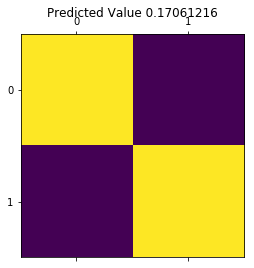

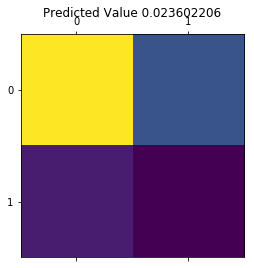

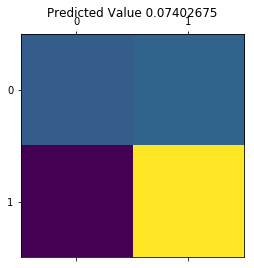

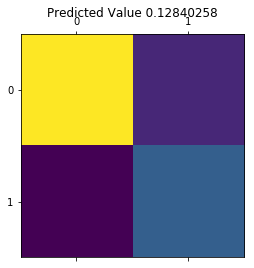

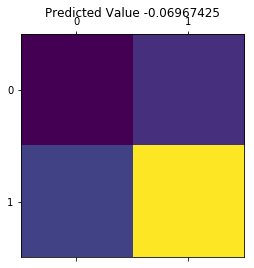

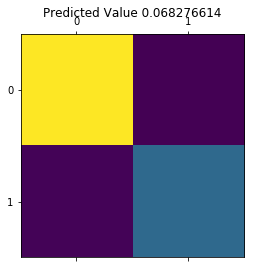

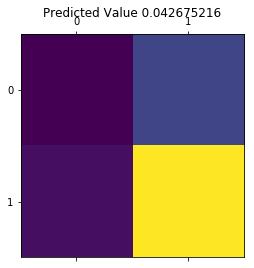

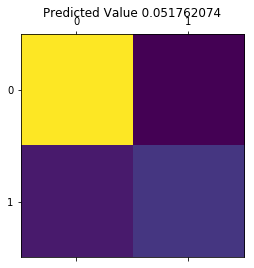

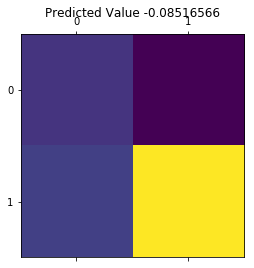

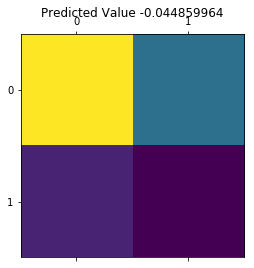

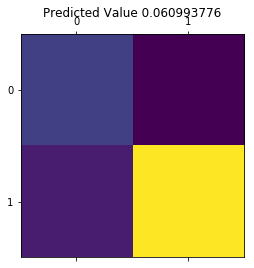

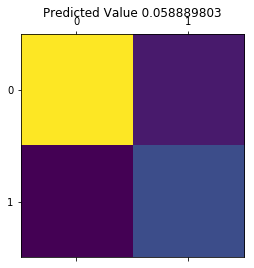

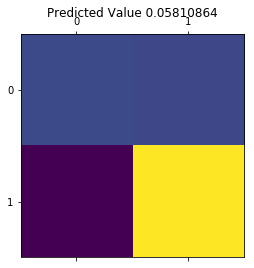

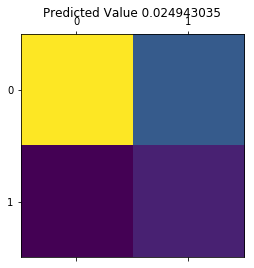

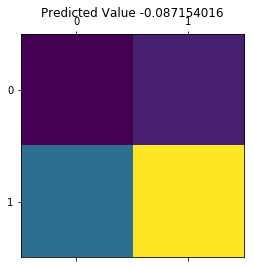

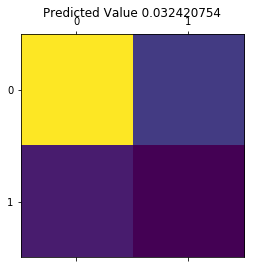

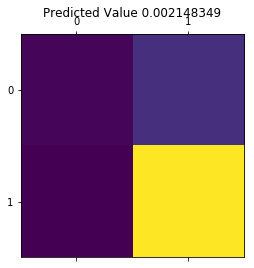

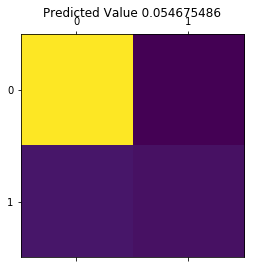

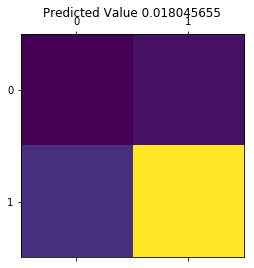

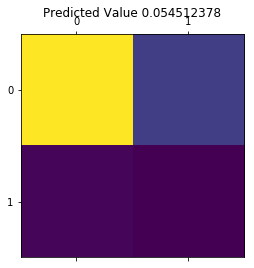

In [141]:
z = model.predict(x)

# look at results
import matplotlib.pyplot as plt
for i in range(20):
    plt.matshow(x[i,:,:,0])
    plt.title("Predicted Value " + str(z[i,0]))

plt.show()

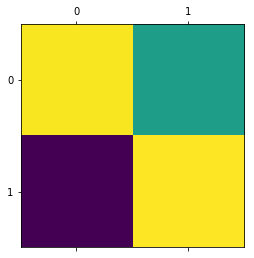

In [142]:
weights = model.get_weights()[0]
plt.matshow(weights[:,:,0,0])


Can see the diagonals have largest magnitude, the network is learning "detect the vertical line by adding the 2 diagonals up and ensuring they're large enough while ignoring the off diagonals".

### Transpose Convolutional Layer

Where a Convolutional Layer applies a matrix to a collection of points to get a single output, a Transpose Convolutional Layer applied a matrix to a single point to get multiple outputs.

![image.png](tranpose_convolution_2.png)
![image.png](tranpose_convolution.png)

* Convolutional Layers = compress information
* Transpose Convolutional Layers = decompress information

## Super Resolution CNN Networks

### Goal
Turn low resolution images into high resolution images.### History

A method previously used to generate high resolution images was the sparse-coding based method.

Followed a few steps
1. Overlapping patches are densely cropped from the input  image  and  pre-processed  (e.g.,subtracting  mean and  normalization).
2. These  patches  are  then  encoded by  a  low-resolution  dictionary.
3. The sparse  coefficients are  passed  into  a  high-resolution  dictionary  for  reconstructing  high-resolution  patches.  
4. The overlapping  reconstructed  patches  are  aggregated  (e.g., by  weighted averaging)  to  produce  the  final  output.  


This  pipeline  is shared by most external example-based methods, which pay  particular  attention  to  learning  and  optimizing  the dictionaries or  building  efficient  mapping functions.  However,  the  rest  of  the steps  in  the  pipeline  have  been  rarely  optimized  or considered in an unified optimization framework.


### Modern Approach

Construct a Convolutional Neural Network to do all these steps in a unified framework.


### Model Design
![image.png](sr_model.png)

Goal: Transform a 200x200 pixel image to a 400x400 pixel image.
1. Use a Transpose Convolutional Layer to map 200x200 image to a 400x400 image.
2. Use a series of Convolutional Layers to enhance this 400x400 image.
    * First Layer produces a series of feature maps.
    * Second Layer applies a nonlinear transformation to a smaller subset of features.
    * Third layer collect the data and uses it to reconstruct the image.

### Output
![image.png](sr_model_2.png)

![image.png](example.png)


## Personal Project
https://github.com/ryanhalabi/starcraft_super_resolution/

### Goal
Upscale still frames for Starcraft 5x.

